In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import Binarizer

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

## 1.  종양종류 예측(모델학습/예측/평가지표)

### (1) load_breast_cancer데이터를 Logistic Regression으로 예측하고 정확도, 정밀도, 재현율, 오차행렬을 산출하세요.

- load_breast_cancer은 위스콘신 유방암 데이터로 악성종양(malignant)과 양성종양(benign)으로 구분되는 데이터세트 입니다. 
- 타깃 레이블 값의 종류는 악성이 '0'으로 양성이 '1'로 되어 있습니다.
- sklearn.model_selection 의 train_test_split(test_size=0.3, random_state=11) 이용.
- sklearn.linear_model의 LogisticRegression(random_state=11).
- sklearn.metrics의 정확도, 정밀도, 재현율, 오차행렬 이용.

In [4]:
dataset = load_breast_cancer()
X_features=dataset.data
y_label=dataset.target

In [5]:
X_train ,X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.3, random_state=11)

In [6]:
lr_clf = LogisticRegression(random_state=11, max_iter=2000)

In [7]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
precision = precision_score(pred, y_test)
recall = recall_score(pred, y_test)
cm = confusion_matrix(pred, y_test)

print(f'정확도: {accuracy}\n정밀도: {precision}\n재현율: {recall}\n오차행렬:\n{cm}')

정확도: 0.9298245614035088
정밀도: 0.9545454545454546
재현율: 0.9375
오차행렬:
[[ 54   5]
 [  7 105]]


## 2. 임계값에 따른 성능 평가 지표

### (1) 임계값이 0.3, 0.5, 0.7, 0.9일때 오차행렬, 정확도, 정밀도, 재현율을 구하세요

In [8]:
thresholds = [0.3, 0.5, 0.7, 0.9]

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[9.99999713e-01, 2.87161421e-07],
       [1.00000000e+00, 1.01792057e-10],
       [9.99999988e-01, 1.18455230e-08],
       [9.99999986e-01, 1.44512231e-08],
       [1.00000000e+00, 1.13942059e-10],
       [8.39544473e-04, 9.99160456e-01],
       [9.79956976e-02, 9.02004302e-01],
       [2.60311201e-03, 9.97396888e-01],
       [1.40132939e-05, 9.99985987e-01],
       [7.84603446e-04, 9.99215397e-01],
       [4.82658892e-05, 9.99951734e-01],
       [8.08599433e-01, 1.91400567e-01],
       [1.60997206e-01, 8.39002794e-01],
       [2.67814602e-06, 9.99997322e-01],
       [1.49539874e-07, 9.99999850e-01],
       [1.68520680e-04, 9.99831479e-01],
       [9.32306982e-01, 6.76930182e-02],
       [1.35183535e-01, 8.64816465e-01],
       [3.48395309e-04, 9.99651605e-01],
       [1.00000000e+00, 1.40216220e-10],
       [9.94755163e-01, 5.24483734e-03],
       [2.28636745e-05, 9.99977136e-01],
       [1.38943118e-04, 9.99861057e-01],
       [3.68649784e-06, 9.99996314e-01],
       [9.484045

In [10]:
pred_proba_1 = pred_proba[:,1]
pred_proba_1.reshape(-1,1)

array([[2.87161421e-07],
       [1.01792057e-10],
       [1.18455230e-08],
       [1.44512231e-08],
       [1.13942059e-10],
       [9.99160456e-01],
       [9.02004302e-01],
       [9.97396888e-01],
       [9.99985987e-01],
       [9.99215397e-01],
       [9.99951734e-01],
       [1.91400567e-01],
       [8.39002794e-01],
       [9.99997322e-01],
       [9.99999850e-01],
       [9.99831479e-01],
       [6.76930182e-02],
       [8.64816465e-01],
       [9.99651605e-01],
       [1.40216220e-10],
       [5.24483734e-03],
       [9.99977136e-01],
       [9.99861057e-01],
       [9.99996314e-01],
       [9.90515954e-01],
       [9.99977124e-01],
       [9.99999339e-01],
       [7.86451892e-01],
       [9.98168964e-01],
       [9.66805483e-01],
       [9.98972849e-01],
       [9.99751504e-01],
       [9.99965134e-01],
       [9.99967321e-01],
       [9.27787453e-01],
       [9.99850403e-01],
       [9.85531438e-01],
       [9.97952071e-01],
       [9.80044539e-01],
       [9.09923980e-01],


In [11]:
for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold)
    transformed = binarizer.fit_transform(pred_proba_1.reshape(-1,1))

    accuracy = accuracy_score(transformed, y_test)
    precision = precision_score(transformed, y_test)
    recall = recall_score(transformed, y_test)
    cm = confusion_matrix(transformed, y_test)
    print(f'임계값: {threshold} \n정확도: {accuracy}\n정밀도: {precision}\n재현율: {recall}\n오차행렬:\n{cm}\n')

임계값: 0.3 
정확도: 0.9298245614035088
정밀도: 0.9636363636363636
재현율: 0.9298245614035088
오차행렬:
[[ 53   4]
 [  8 106]]

임계값: 0.5 
정확도: 0.9298245614035088
정밀도: 0.9545454545454546
재현율: 0.9375
오차행렬:
[[ 54   5]
 [  7 105]]

임계값: 0.7 
정확도: 0.9473684210526315
정밀도: 0.9545454545454546
재현율: 0.963302752293578
오차행렬:
[[ 57   5]
 [  4 105]]

임계값: 0.9 
정확도: 0.9415204678362573
정밀도: 0.9272727272727272
재현율: 0.9807692307692307
오차행렬:
[[ 59   8]
 [  2 102]]



### (2) positive(1)에 대한 임계값 변화에 따른 예측확률의 정밀도-재현율 변화 곡선을 시각화해 보세요.

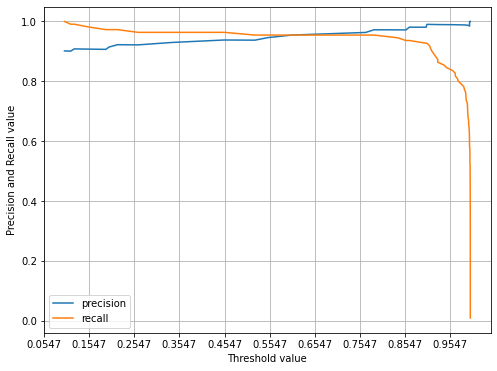

In [12]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)
plt.figure(figsize=(8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

start, end = plt.xlim()
plt.xticks(np.arange(start, end, 0.1))

plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
plt.legend(); plt.grid()
plt.show()

### (3) 위의 결과들을 볼 때 이 모델은 좋은 모델이라고 할 수 있을까요? 이에 대한 답과 이유를 서술하세요. 
### 또한 임계치가 어느 정도일때 가장 좋은 성능인지 자유롭게 서술하세요.

답:

좋은 모델인지는 글쎄요 그래프 해석하는 법을 잘 모르겠습니다. 임계치에 따라 다르지 않을까요

임계치 약 0.6에서 정밀도와 재현율이 비슷해지기 때문에 0.6에서 가장 좋은 성능을 보인다고 할 수 있습니다.


## 3. 과일종류 예측(모델학습/예측/평가지표)

### (1) 데이터 확인 및 전처리
- citrus.csv는 오렌지와 자몽의 직경, 무게, 색상(RGB) 데이터 입니다. 직경, 무게, 색상(RGB)로 오렌지와 자몽을 분류해 봅시다.
- 아래의 코드를 실행시켜 주세요

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
citrus_df=pd.read_csv('./citrus.csv')
display(citrus_df.head())
print('\n')
print(citrus_df.info())
print('\n')
print(citrus_df['name'].value_counts())

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None


grapefruit    5000
orange        5000
Name: name, dtype: int64


1)  'grapefruit'와 'orange'를 각각 '0', '1'로 인코딩 해주세요

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
citrus_df['name'] = encoder.fit_transform(citrus_df['name'])
citrus_df

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [15]:
citrus_df['name'].value_counts()

1    5000
0    5000
Name: name, dtype: int64

### (2) 데이터 분리 및 예측
1) 'name'을 레이블로, 나머지는 피쳐로 나누고, train/test 데이터를 나눠주세요(test_size=0.2)

In [16]:
y_labels = citrus_df['name']
X_features = citrus_df.drop('name', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=11)

In [17]:
X_features

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [18]:
y_labels

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int32

2) 결정트리, 랜덤포레스트, 로지스틱 회귀(이 순서를 계속 유지)를 이용하여 모델학습과 예측을 수행하세요.
- 결정트리와 랜덤포레스트의 경우, random_state=11
   (DecisonTreeClassifier(random_state=11),RandomForestClassifier(random_state=11))
- 모델변수명을 차례대로 dt_clf, rt_clf, lr_clf 로 설정하세요.
- 예측값 변수명을 차례대로 dt_pred, rt_pred, lr_pred 로 설정하세요.

In [19]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)


rt_clf = RandomForestClassifier()
rt_clf.fit(X_train, y_train)
rt_pred = rt_clf.predict(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

### (3) 성능 평가 지표 구하기

1) 오차행렬을 파악하기 위해 각 모델에서의 예측확률값을 구하고 성능 평가 지표를 구하는 함수인 get_clf_eval을 작성하세요.
- 예측확률값은 dt_pred_proba, rt_pred_proba, lr_pred_proba 에 저장하세요.
- get_clf_eval은 평가지표 4가지 [정확도, 정밀도, 재현율, f1_score]를 포함하여야합니다.

In [20]:
def get_clf_eval(y_test , pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    confusion = confusion_matrix(y_test, pred)
    
    print(f'\n정확도: {accuracy}\n정밀도: {precision}\n재현율: {recall}\nf1스코어: {f1}\n오차행렬:\n{cm}\n')

dt_pred_proba = dt_clf.predict_proba(X_test)
rt_pred_proba = rt_clf.predict_proba(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)

2) get_clf_eval를 사용하여 결정트리, 랜덤포레스트, 로지스틱 회귀의 성능 평가 지표값(오차행렬)을 출력하여 주세요

In [21]:
# 결정트리
get_clf_eval(y_test,dt_pred, dt_pred_proba[:,1])


정확도: 0.9435
정밀도: 0.9332003988035892
재현율: 0.9531568228105907
f1스코어: 0.9430730478589421
오차행렬:
[[ 59   8]
 [  2 102]]



In [22]:
# 랜덤포레스트
get_clf_eval(y_test,rt_pred, rt_pred_proba[:,1])


정확도: 0.953
정밀도: 0.9512195121951219
재현율: 0.9531568228105907
f1스코어: 0.9521871820956256
오차행렬:
[[ 59   8]
 [  2 102]]



In [23]:
# 로지스틱회귀
get_clf_eval(y_test,lr_pred, lr_pred_proba[:,1])


정확도: 0.955
정밀도: 0.9588477366255144
재현율: 0.9490835030549898
f1스코어: 0.9539406345957011
오차행렬:
[[ 59   8]
 [  2 102]]



3) 어떤 모델의 성능이 가장 떨어진다고 할 수 있나요? 그 이유는 무엇인가요?

답:

결정트리. f1 스코어와 정확도가 가장 낮기 때문입니다.

그런데 로지스틱 회귀의 경우 Label을 인코딩할 때 레이블인코더로 0,1로 하면 왜곡이 생기기 때문에 원핫인코딩을 적용해야 하는 것으로 알고 있습니다.

## 4. ROC 곡선 및 AUC

### (1) 모델별 ROC 곡선
- fprs, tprs 를 이용하여 roc 곡선을 그릴 수 있는 함수인 roc_curve_plot을 작성하세요.
- 임계값 간 간격은 5로 설정해주세요.
- 세 모델의 roc 곡선을 그리고, plt.subplot(.)을 이용하여 한 면에 세 그래프를 동시에 나타내세요.

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

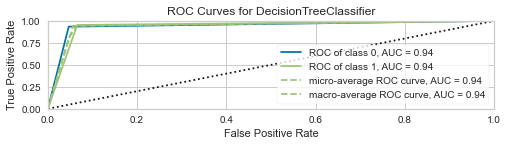

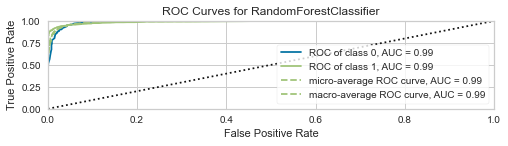

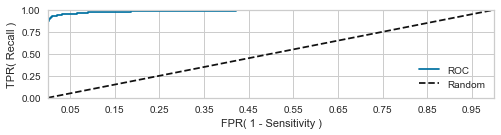

In [25]:
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.classifier import ROCAUC

plt.subplot(311) 
visualizer = ROCAUC(dt_clf, classes=[0,1])
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)
visualizer.show()  

plt.subplot(312)
visualizer = ROCAUC(rt_clf, classes=[0,1])
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)
visualizer.show()   

# 복붙
plt.subplot(313)
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

plt.show()

### (2) 모델별 AUC

1) 각 모델별 AUC를 구하세요.
- 차례대로 dt_roc_auc, rt_roc_auc, lr_roc_auc 에 저장하시고 출력해 주세요.

In [26]:
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba[:,1])
rt_roc_auc = roc_auc_score(y_test, rt_pred_proba[:,1])
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba[:,1])
print(dt_roc_auc)
print(rt_roc_auc)
print(lr_roc_auc)

0.9436707493227807
0.9904374017181568
0.9888323816916681


2) AUC 기준으로, 어느 모델의 성능이 가장 떨어지나요? 그 이유는 무엇인가요?

답:

결정나무. 1에 가까울수록 성능이 좋기 때문에